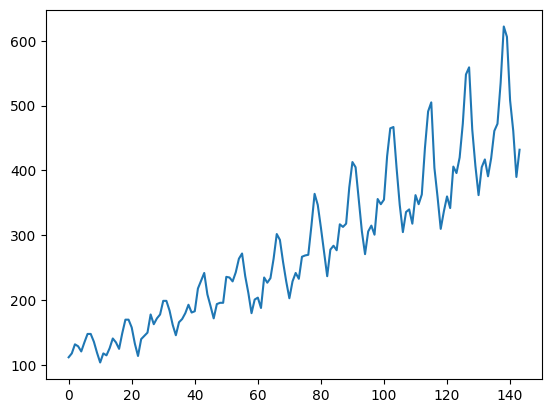

In [45]:


import pandas as pd

df = pd.read_csv('./input/airline-passengers.csv', usecols=[1], engine='python')
df = df.values
df = df.astype('int32')

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(df)

In [81]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler


# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for curri in range(len(dataset) - look_back - 1):
        nexti = curri + look_back
        dataX.append(dataset[curri: nexti])
        dataY.append(dataset[nexti: nexti + 1])
    return np.array(dataX), np.array(dataY)

# normalize the dataset
# scaler = MinMaxScaler(feature_range=(0, 1))
# normdf = scaler.fit_transform(df)
# train = normdf[:100]
# test = normdf[100:]

train = df[:100]
test = df[100:]

# change X, y into X=t and Y=t+1
look_back = 10
xtrain, ytrain = create_dataset(train, look_back)
xtest, ytest = create_dataset(test, look_back)

# reshape input to be: [samples, time steps, features]
xtrain = np.reshape(xtrain, (xtrain.shape[0], 1, xtrain.shape[1]))
xtest = np.reshape(xtest, (xtest.shape[0], 1, xtest.shape[1]))

print(xtest[-1:])
print(xtest.shape)


[[[417 391 419 461 472 535 622 606 508 461]]]
(33, 1, 10)


Epoch 1/150


2023-01-10 15:55:41.739650: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-10 15:55:42.046499: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-10 15:55:42.109817: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-10 15:55:42.170470: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-10 15:55:42.246758: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-10 15:55:42.391762: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-10 15:55:42.524669: I tensorflow/core/grappler/optimizers/cust

89/89 [==============================] - 4s 16ms/step - loss: 226.4912 - mean_absolute_error: 226.4912
Epoch 2/150
89/89 [==============================] - 1s 14ms/step - loss: 223.6626 - mean_absolute_error: 223.6626
Epoch 3/150
89/89 [==============================] - 1s 14ms/step - loss: 220.0984 - mean_absolute_error: 220.0984
Epoch 4/150
89/89 [==============================] - 1s 16ms/step - loss: 217.9706 - mean_absolute_error: 217.9706
Epoch 5/150
89/89 [==============================] - 1s 14ms/step - loss: 216.3172 - mean_absolute_error: 216.3172
Epoch 6/150
89/89 [==============================] - 1s 14ms/step - loss: 214.8358 - mean_absolute_error: 214.8358
Epoch 7/150
89/89 [==============================] - 1s 15ms/step - loss: 213.4406 - mean_absolute_error: 213.4406
Epoch 8/150
89/89 [==============================] - 1s 14ms/step - loss: 212.0972 - mean_absolute_error: 212.0972
Epoch 9/150
89/89 [==============================] - 1s 14ms/step - loss: 210.7880 - mean_ab

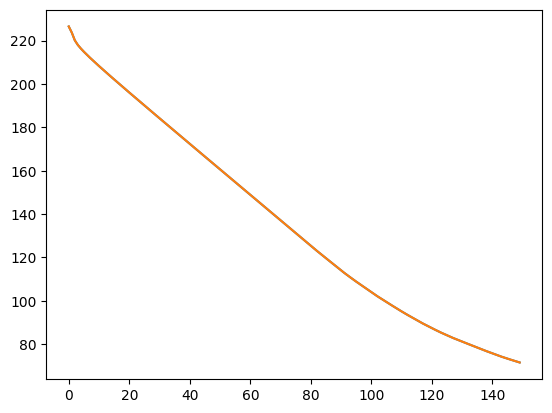

In [82]:
import tensorflow as tf
from libs.simple_plotter import plot_history

# features_count = X_train.shape[0]

early_stopping = tf.keras.callbacks.EarlyStopping(
    min_delta=0.1,  # minimium amount of change to count as an improvement
    patience=7,  # how many epochs to wait before stopping
    restore_best_weights=True
)

model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(16, input_shape=(1, look_back), return_sequences=True))
model.add(tf.keras.layers.LSTM(16, input_shape=(1, look_back), return_sequences=True))
model.add(tf.keras.layers.LSTM(16, input_shape=(1, look_back), return_sequences=False))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer=tf.keras.optimizers.Adam()
              , loss=tf.keras.losses.MeanAbsoluteError()
              , metrics=tf.metrics.MeanAbsoluteError())

history = model.fit(xtrain, ytrain
                    , epochs=150
                    , callbacks=[early_stopping]
                    , batch_size=1
                    , use_multiprocessing=True)

# print(history.history)
plot_history(history)


2/2 [==============================] - 0s 42ms/step
MAE:  194.85597229003906
[[167.14403]
 [167.14403]
 [167.14403]
 [167.14403]
 [167.14403]
 [167.14403]
 [167.14403]
 [167.14403]
 [167.14403]
 [167.14403]
 [167.14403]
 [167.14403]
 [167.14403]
 [167.14403]
 [167.14403]
 [167.14403]
 [167.14403]
 [167.14403]
 [167.14403]
 [167.14403]
 [167.14403]
 [167.14403]
 [167.14403]
 [167.14403]
 [167.14403]
 [167.14403]
 [167.14403]
 [167.14403]
 [167.14403]
 [167.14403]
 [167.14403]
 [167.14403]
 [167.14403]]


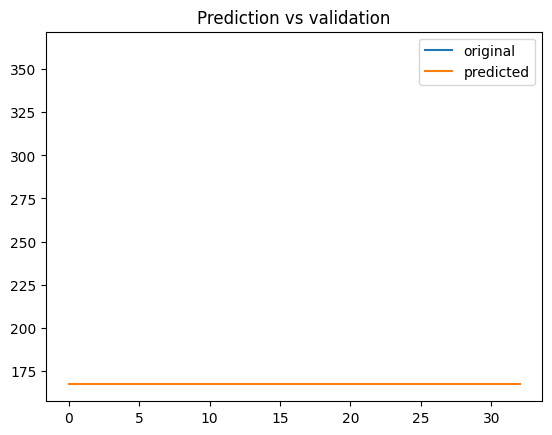

<Figure size 4000x1500 with 0 Axes>

In [85]:
from libs.simple_plotter import plot_predictions
from sklearn.metrics import mean_absolute_error
#
pred = model.predict(xtest)
# pred = scaler.inverse_transform(pred)
#
# pred
# print(ytest)
# yt = scaler.inverse_transform(ytest[0])
# print(yt)

# print(yt[0][0].shape, pred[0].shape)
# print(yt[0][0], pred[0])
#
testScore = mean_absolute_error(ytest[0][0], pred[0])
print('MAE: ', testScore)
#
# test = ytest[0][0]

print(pred)

tscale = range(len(test))
pscale = range(len(pred))
plt.plot(tscale, test[:len(test)], label="original")
plt.plot(pscale, pred, label="predicted")
plt.title("Prediction vs validation")
plt.legend()
fig = plt.figure(figsize=(40, 15))


last:  [[[38 38]]]
last:  [38 38]
1/1 [==============================] - 0s 55ms/step
np:  [[[38 38]]]
last:  [38 38]
1/1 [==============================] - 0s 19ms/step
np:  [[[38 38]]]
last:  [38 38]
1/1 [==============================] - 0s 26ms/step
np:  [[[38 38]]]
last:  [38 38]
1/1 [==============================] - 0s 21ms/step
np:  [[[38 38]]]
last:  [38 38]
1/1 [==============================] - 0s 29ms/step
np:  [[[38 38]]]
last:  [38 38]
1/1 [==============================] - 0s 31ms/step
np:  [[[38 38]]]
last:  [38 38]
1/1 [==============================] - 0s 29ms/step
np:  [[[38 38]]]
last:  [38 38]
1/1 [==============================] - 0s 26ms/step
np:  [[[38 38]]]
last:  [38 38]
1/1 [==============================] - 0s 29ms/step
np:  [[[38 38]]]


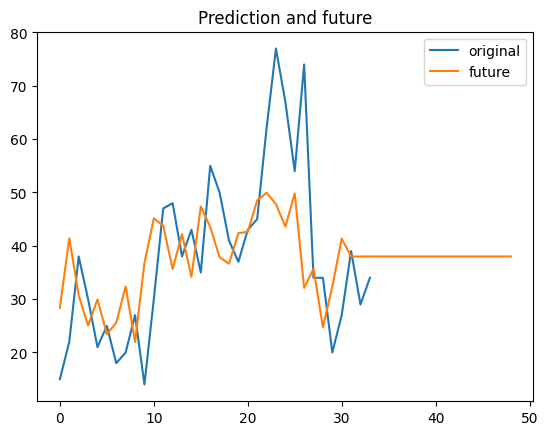

<Figure size 5000x2500 with 0 Axes>

In [85]:
# pętla robiąca predykcję na kilka m-cy w przód

import numpy as np

# last =  [[[27, 39]]]
last = X_train[-1:]
print('last: ', last)

# X_train.shape
# last.shape
# last
pred = y_pred.copy()

# y_pred

for i in range(1, 10):
    print('last: ', last[0][0])
    new = model.predict(last)
    # np = np.ndarray(last)
    arr = last.copy()
    arr[0][0][0] = arr[0][0][1]
    arr[0][0][1] = new
    print('np: ', arr)

    # obiekt numpy z okreslonym shapem

    pred = np.append(pred, arr)
    last = arr  # (27, 29) => (29, new)
#
scale = range(len(sales_shop.monthly_sales))
scale1 = range(len(pred))
plt.plot(scale, sales_shop.monthly_sales[:len(sales_shop.monthly_sales)], label="original")
plt.plot(scale1, pred, label="future")
plt.title("Prediction and future")
plt.legend()
fig = plt.figure(figsize=(50, 25))
